In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [2]:
ass_data = pd.read_csv('../src/data/assessor_clean.csv', parse_dates=['CurrentSalesDate'])

/home/alex/EECS_731/EECS731_FinalProject/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preliminary Cleaning

This data is very messy, and needs some work right off the bat.  For starters, many rows have 0 or null values for key columns we want to draw conclusions on.  Some of these make sense, for instance empty lots will have a property area and assessed improvement value of 0.  Others, like a lot area of 0 seem to indicate some error in reporting.

Next, there are a number of properties where PropertyArea > LotArea * NumberofStories, which should be impossible.

Finally, a couple *huge* lots in the millions of square feet are excluded from analysis since they dwarf all others by orders of magnitude

In [3]:
ass_data = ass_data.query('PropertyArea > 0 and LotArea > 0 and NumberofStories > 0 and AssessedImprovementValue > 0')

# about 4 thousand properties are listed as having more square feet than is possible, not sure why
ass_data = ass_data.query('PropertyArea <= LotArea * NumberofStories')

ass_data = ass_data.query('LotArea < 300000')

# Data Exploration

As we would expect, a definite positive correlation exists between property area and property value.  Some anomalies can already be picked out by eye from this graph

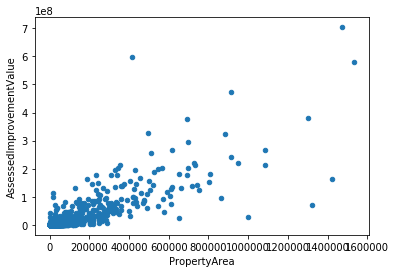

In [4]:
ass_data.plot.scatter(x='PropertyArea', y='AssessedImprovementValue')

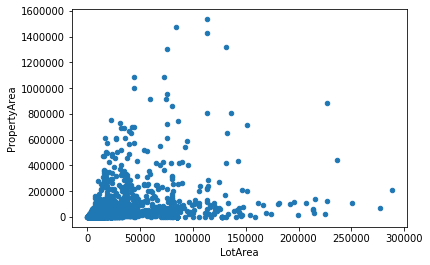

In [5]:
ass_data.plot.scatter(x='LotArea', y='PropertyArea')

In [6]:
ass_data.dtypes

ClosedRollYear                          float64
PropertyLocation                         object
ParcelNumber                             object
Block                                    object
Lot                                      object
VolumeNumber                              int64
UseCode                                  object
UseDefinition                            object
PropertyClassCode                        object
PropertyClassCodeDefinition              object
YearPropertyBuilt                       float64
NumberofBathrooms                       float64
NumberofBedrooms                          int64
NumberofRooms                             int64
NumberofStories                           int64
NumberofUnits                             int64
ZoningCode                               object
ConstructionType                         object
LotDepth                                float64
LotFrontage                             float64
PropertyArea                            

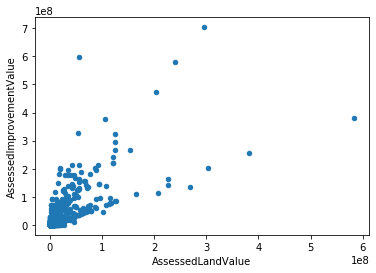

In [7]:
ass_data.plot.scatter(x='AssessedLandValue', y='AssessedImprovementValue')

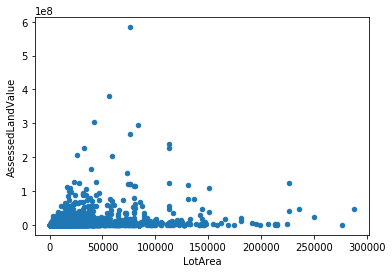

In [8]:
ass_data.plot.scatter(x='LotArea', y='AssessedLandValue')

Initial attempts at anomaly detection seem to identify "mansion" and "non-mansion" categories, which isn't too helpfull...

Feature engineering with value / sqare foot might help us out here

In [9]:
model = EllipticEnvelope()
labels = model.fit_predict(ass_data[['PropertyArea', 'AssessedImprovementValue']])

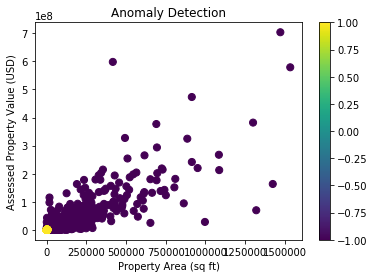

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(ass_data['PropertyArea'], ass_data['AssessedImprovementValue'], c=labels, s=50)
ax.set_title('Anomaly Detection')
ax.set_xlabel('Property Area (sq ft)')
ax.set_ylabel('Assessed Property Value (USD)')

#ax.set_xlim([0, 10000])
#ax.set_ylim([0, 10000000])

plt.colorbar(scatter)
plt.show()